# Networks

This lesson introduces the network data structure.  Aspects of this lesson are adapted from Andrew Brooks' tutorial on graph optimization.  

https://www.datacamp.com/community/tutorials/networkx-python-graph-tutorial

It also draws from theory material presented at PyCon 2015 by Celia La and Sarah Guido.  

https://github.com/sarguido/networkx-tutorial

You will need to install two packages:

pip install networkx
pip install imageio

The networkx documentation is here: 

https://networkx.github.io/

In [1]:
# imports
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

# Intro to NetworkX

### Adding & editing graph nodes

We'll first take a look at creating a graph, and adding/editing nodes:

In [2]:
import networkx as nx

'''use g = nx.Graph() to create a graph'''

g = nx.Graph()

'''Lesson: use .add_node(1) to add a single node'''
g.add_node(1)

'''Lesson: use .add_nodes_from([2, 3, 'four', 5])  to add in bulk'''
g.add_nodes_from([2, 3, 'four', 5])

g.nodes()  # run g.nodes() to view the graph

NodeView((1, 2, 3, 'four', 5))

In [3]:
'''Note that NetworkX won't complain if we re-add pre-existing nodes'''

# TODO: try re-adding nodes to see what happens

g.add_nodes_from([2, 4, 5])  # display nodes
g.nodes()

NodeView((1, 2, 3, 'four', 5, 4))

In [4]:
'''Lesson: remove syntax is similar to adding, eg:
        .remove_node()
        .remove_nodes_from()
'''

# TODO: try removing both 1) single nodes, 2) nodes in bulk


g.remove_nodes_from([1, 4, 2])
g.nodes()  # display nodes

NodeView((3, 'four', 5))

### Adding & editing edges

In [5]:
h = nx.Graph()  # let's create a 2nd graph to play with edges

'''Lesson: to create an edge, just specify the 2 nodes that define it: 
        .add_edge('a','b')
    Note that those nodes also get added (no need to make them beforehand!)
'''

h.add_edge('a', 'b')


print('edges:', h.edges())  # see your new edge
print('nodes:', h.nodes())  # verify that new nodes were also added

edges: [('a', 'b')]
nodes: ['a', 'b']


### Visualizing graphs

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


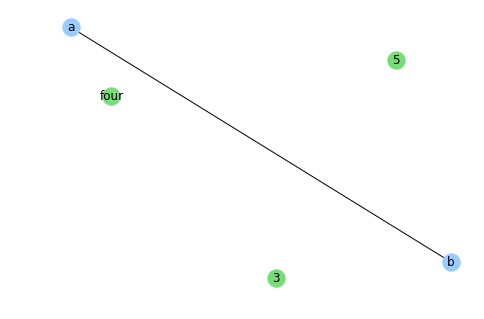

In [6]:

GREEN = "#77DD77"
BLUE = "#99CCFF"

nx.draw(g, node_color=GREEN, with_labels=True)
nx.draw(h, node_color=BLUE, with_labels=True)



#### How would you create the following graph?

<img src="img/graph.png" style="float:left" width="200" />

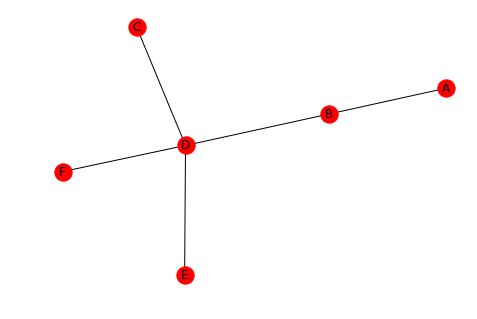

In [7]:
g = nx.Graph()

g.add_edges_from([('A','B'),('B','D'),('C','D'),('E','D'),('F','D')])
nx.draw(g, with_labels = True)

# Directed graphs

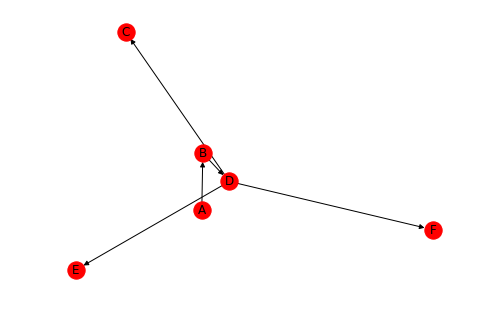

In [8]:
g = nx.DiGraph()

g.add_edges_from([('A','B'),('B','D'),('D','C'),('D','E'),('D','F')])
nx.draw(g, with_labels = True)

directed edges: [(1, 2), (2, 3)]


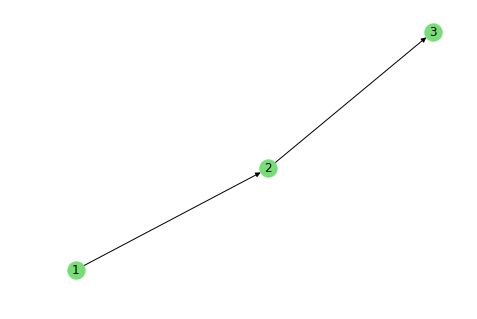

In [9]:
'''Lesson: use nx.DiGraph() to create a new directed graph
'''

dg = nx.DiGraph()


dg.add_edges_from([(1,2), (2,3)])

print('directed edges:', dg.edges())
nx.draw(dg, node_color=GREEN, with_labels=True)


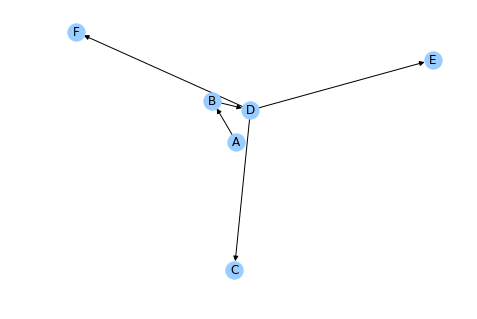

In [10]:
'''We can make directed graphs from existing graphs, eg:
        nx.DiGraph(g)
'''

dg = nx.DiGraph(g) #take note


nx.draw(dg, node_color=BLUE, with_labels=True)

In [11]:
#g = nx.DiGraph()
#g.add_edges_from([('A','B'),('B','D'),('C','D'),('E','D'),('F','D')])
#nx.draw(g, node_color=GREEN, with_labels=True)

In [12]:
''' Notice that nodes A and B have TWO directed edges:
        A -> B
        B -> A
'''

dg.edges()

OutEdgeView([('A', 'B'), ('B', 'D'), ('D', 'C'), ('D', 'E'), ('D', 'F')])

### Adding attributes to nodes and edges

Sometimes you may want to attach attributes to either the nodes or edges:

* Perhaps you want to save node properties that will be helpful with future analysis
* Perhaps you want to attach visual descriptions, such a node size, edge width or graph color

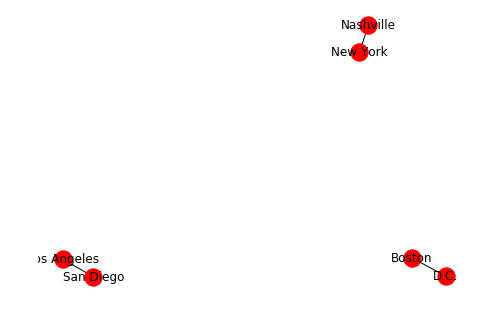

In [13]:
cities = nx.Graph()

cities.add_edge('San Diego', 'Los Angeles', attr_dict = { 'distance': 0.4})
cities.add_edge('New York', 'Nashville', attr_dict ={ 'distance': 5.6})
cities.add_edge('Boston', 'D.C.', attr_dict ={ 'distance': 0.8})

nx.draw(cities, with_labels = True)

# Describing a network

### Degree Distribution:



<img src="img/graph.png" style="float:left; padding-right:20px;" width="200" />

- 1 node with 4 edges
- 1 node with 2 edges
- 4 nodes with 1 edge

Distribution:

    [(1:4), (1:2), (4:1)]


In [14]:
# Degree Distribution for all nodes
print('Degree Distribution:', g.degree())

Degree Distribution: [('A', 1), ('B', 2), ('D', 4), ('C', 1), ('E', 1), ('F', 1)]


Avg shortest path from A to E is 3 hops:
['A', 'B', 'D', 'E']


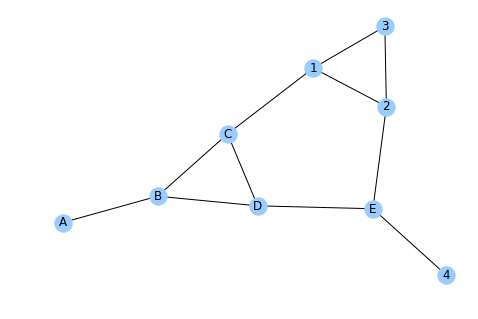

In [15]:
# Generate the graph above
paths = nx.Graph()
paths.add_edges_from([
    ('A','B'), ('B','D'), ('B','C'), ('D','E'), ('D','C'),
    ('C','1'), ('1','2'), ('1','3'), ('2','3'), 
    ('E','2'), ('E','4')])

nx.draw(paths, node_color=BLUE, with_labels=True)

# Display average shortest path details
print('Avg shortest path from A to E is', nx.shortest_path_length(paths, 'A','E'), 'hops:')
print(nx.shortest_path(paths, 'A','E'))

## Network Centrality (the higher result is better!)

* **Degree: number of edges** for node X
* **Betweenness: number of shortest paths** that pass through node X
* **Closeness: average of the shortest paths** between X and all other nodes

<img src="img/centrality1.png" style="float:left;" width="400" />
<img src="img/centrality2.png" style="float:left;" width="200" />



In [16]:
''' To calculate Degree Distribution for all nodes, use:
    g.degree()  for non-normalized values,
    nx.degree_centrality(g)   for normalized values
'''

# degree distrib., non-normalized
print('Degree Centrality:')
print(g.degree())

# TODO degree distrib., normalized
print('\nDegree Centrality, Normalized:')
print(nx.degree_centrality(g))


Degree Centrality:
[('A', 1), ('B', 2), ('D', 4), ('C', 1), ('E', 1), ('F', 1)]

Degree Centrality, Normalized:
{'A': 0.2, 'B': 0.4, 'D': 0.8, 'C': 0.2, 'E': 0.2, 'F': 0.2}


In [17]:
''' To calculate betweenness centrality, use:
    nx.betweenness_centrality(g, normalized=True/False)   default is True
'''

# betweenness centrality, non-normalized
print('Betweenness Centrality:')
print(nx.betweenness_centrality(g, normalized=False))

# betweenness centrality, normalized
print('\nBetweenness Centrality, Normalized:')
print(nx.betweenness_centrality(g, normalized=True))


Betweenness Centrality:
{'A': 0.0, 'B': 4.0, 'D': 6.0, 'C': 0.0, 'E': 0.0, 'F': 0.0}

Betweenness Centrality, Normalized:
{'A': 0.0, 'B': 0.2, 'D': 0.30000000000000004, 'C': 0.0, 'E': 0.0, 'F': 0.0}


In [18]:
''' to calculate closeness centrality, use:
    nx.closeness_centrality(g)
'''

# find closeness centrality
print('Closeness Centrality:')
print(nx.closeness_centrality(g))

Closeness Centrality:
{'A': 0.0, 'B': 0.2, 'D': 0.26666666666666666, 'C': 0.3, 'E': 0.3, 'F': 0.3}


# Back to Airline Networks

Previously we used open flights to examine airline routes around the world.  We found that it was a bit of a pain to store the data in tables, and merge different information.  We can model it as network instead.  I've cleaned the data up a bit, and selected out only the routes operated by Delta, making it a bit more managable.  


In [50]:
# read the data
routes = pd.read_csv('data/delta_routes.csv')
routes.head()

,Unnamed: 0,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment,latitude_source,longitude_source,latitude_dest,longitude_dest
0,0,DL,2009.0,ABE,4355.0,ATL,3682.0,NaN,0,717,40.652100,-75.440804,33.636700,-84.428101
1,1,DL,2009.0,ABQ,4019.0,ATL,3682.0,NaN,0,757 320,35.040199,-106.609001,33.636700,-84.428101
2,2,DL,2009.0,ABQ,4019.0,MSP,3858.0,NaN,0,320,35.040199,-106.609001,44.882000,-93.221802
3,3,DL,2009.0,ACC,248.0,JFK,3797.0,NaN,0,76W,5.605190,-0.166786,40.639801,-73.778900
4,4,DL,2009.0,ACC,248.0,ROB,1063.0,NaN,0,76W,5.605190,-0.166786,6.233790,-10.362300


### As a review, let's build an interactive map to see what this looks like



In [20]:
import pyproj
import folium

In [21]:

# when creating a function, it is good practice to define the API!
def getGreatCirclePoints(startlat, startlon, endlat, endlon): 
    """
    startlat - starting latitude 
    startlon - starting longitude 
    endlat   - ending latitude 
    endlon   - ending longitude 
    
    returns - a list of tuples, where each tuple is the lat-long for a point
              along the curve.  
    """
    # calculate distance between points
    g = pyproj.Geod(ellps='WGS84')
    (az12, az21, dist) = g.inv(startlon, startlat, endlon, endlat)

    # calculate line string along path with segments <= 20 km
    lonlats = g.npts(startlon, startlat, endlon, endlat,
                     1 + int(dist / 20000))

    # the npts function uses lon-lat, while the folium functions use lat-lon
    # This sort of thing is maddening!  What happens is the lines don't show
    # up on the map and you don't know why.  Learn from my mistakes
    latlons = []
    for lon_lat in lonlats: 
        
        # this is how you get values out of a tuple
        (lon, lat) = lon_lat
        
        # add them to our list
        latlons.append((lat, lon)) 
    
    # npts doesn't include start/end points, so prepend/append them
    latlons.insert(0, (startlat, startlon))
    latlons.append((endlat, endlon))
    
    return latlons


In [22]:
# create a basic map, centered on Lexington
m = folium.Map(
    location=[38.034,-84.500],
    tiles='Stamen Toner',
    zoom_start=4
)

In [23]:
# define the map in the same way, but use great circles for the lines

# Define some empty sets
airport_set = set()
route_set = set()

# Make sure we don't add duplicates, especially for the origins
for name, row in routes.iterrows():
    
    if row['source'] not in airport_set: 
        popup_string = row['source']
        marker = folium.CircleMarker([row["latitude_source"], row["longitude_source"]], 
                                     color='DarkCyan',
                                     fill_color='DarkCyan', 
                                     radius=5, popup=popup_string)
        marker.add_to(m)
        airport_set.add(row['source'])
        
    if row['dest'] not in airport_set: 
        popup_string = row['dest']
        marker = folium.CircleMarker([row["latitude_dest"], row["longitude_dest"]], 
                                     color='MidnightBlue',
                                     fill_color='MidnightBlue', 
                                     radius=5, popup=popup_string)
        marker.add_to(m)
        airport_set.add(row['dest'])
    
    # PolyLine will accept a whole list of tuples, not just two
    if (row['source'],row['dest']) not in route_set:            
        popup_string = row['source'] + '-' + row['dest']       
        
        gc_points = getGreatCirclePoints(row["latitude_source"], 
                                         row["longitude_source"], 
                                         row["latitude_dest"], 
                                         row["longitude_dest"])
        
        line = folium.PolyLine(gc_points, weight=2, popup=popup_string)
        line.add_to(m)
        route_set.add((row['source'],row['dest']))
        

In [24]:
# save it to its own file
m.save("delta.html")

# Homework

1. Represent the Delta flights as a network.  What are the nodes?  What are the links?
2. Which is the most important airport in Delta's network?  Support your answer using appropriate network metrics.  
3. How many flights are needed to reach Honolulu?  
4. What is the maximum number of flights needed to reach any destination in Delta's network?
5. Convert the network into a weighted network, using the travel time as the weight.  Assume that planes fly at 500 mph, plus 30 minutes to take off + 30 minutes to land.  
6. How long does it take to travel to Honolulu, in flight times.  

### 1. Represent the Delta flights as a network. What are the nodes? What are the links?

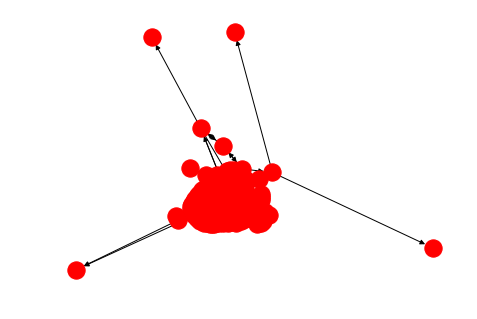

In [31]:
d_flights = nx.DiGraph()

for index, row in routes.iterrows():
    d_flights.add_edge(row['source'], row['dest'])

nx.draw(d_flights)

### Network nodes

In [33]:
print('There are %s nodes in the graph \n' % len(d_flights.nodes()))
d_flights.nodes()

There are 230 nodes in the graph 



NodeView(('ABE', 'ATL', 'ABQ', 'MSP', 'ACC', 'JFK', 'ROB', 'AGS', 'ALB', 'AMS', 'BOM', 'BOS', 'DTW', 'EWR', 'PDX', 'SEA', 'ANC', 'SLC', 'AUA', 'AUS', 'AVL', 'BDA', 'BDL', 'BHM', 'BNA', 'BOG', 'BON', 'BRU', 'BSB', 'BTR', 'BUF', 'BWI', 'BZE', 'CAE', 'CAK', 'CCS', 'CDG', 'CHA', 'CHS', 'CLE', 'CLT', 'CMH', 'COS', 'CRW', 'CUN', 'CVG', 'CZM', 'DAB', 'DAY', 'DCA', 'DEN', 'DFW', 'DSM', 'DUB', 'DUS', 'DXB', 'ECP', 'ELP', 'EYW', 'EZE', 'FAY', 'FCO', 'FLL', 'FNT', 'FPO', 'FRA', 'GCM', 'GDL', 'GIG', 'GNV', 'GPT', 'GRR', 'GRU', 'GSO', 'GSP', 'GUA', 'HNL', 'HOU', 'HSV', 'IAD', 'IAH', 'ICT', 'ILM', 'IND', 'JAN', 'JAX', 'JNB', 'KIN', 'LAS', 'LAX', 'LEX', 'LGA', 'LHR', 'LIM', 'LIR', 'LIT', 'LOS', 'MAD', 'MAN', 'MBJ', 'MCI', 'MCO', 'MDT', 'MDW', 'MEM', 'MEX', 'MGA', 'MHT', 'MIA', 'MKE', 'MLB', 'MOB', 'MSN', 'MSY', 'MUC', 'MYR', 'NAS', 'NRT', 'OKC', 'OMA', 'ORD', 'ORF', 'PAP', 'PBI', 'PHL', 'PHX', 'PIT', 'PLS', 'PNS', 'PTY', 'PUJ', 'PVD', 'PVR', 'PWM', 'RDU', 'RIC', 'ROA', 'ROC', 'RSW', 'RTB', 'SAL', 'SA

### Network edges

In [32]:
print('There are %s edges in the graph \n' % len(d_flights.edges()))
d_flights.edges()

There are 1146 edges in the graph 



OutEdgeView([('ABE', 'ATL'), ('ATL', 'ABE'), ('ATL', 'ABQ'), ('ATL', 'AGS'), ('ATL', 'ALB'), ('ATL', 'AMS'), ('ATL', 'AUA'), ('ATL', 'AUS'), ('ATL', 'AVL'), ('ATL', 'BDA'), ('ATL', 'BDL'), ('ATL', 'BHM'), ('ATL', 'BNA'), ('ATL', 'BOG'), ('ATL', 'BON'), ('ATL', 'BOS'), ('ATL', 'BRU'), ('ATL', 'BSB'), ('ATL', 'BTR'), ('ATL', 'BUF'), ('ATL', 'BWI'), ('ATL', 'BZE'), ('ATL', 'CAE'), ('ATL', 'CAK'), ('ATL', 'CCS'), ('ATL', 'CDG'), ('ATL', 'CHA'), ('ATL', 'CHS'), ('ATL', 'CLE'), ('ATL', 'CLT'), ('ATL', 'CMH'), ('ATL', 'COS'), ('ATL', 'CRW'), ('ATL', 'CUN'), ('ATL', 'CVG'), ('ATL', 'CZM'), ('ATL', 'DAB'), ('ATL', 'DAY'), ('ATL', 'DCA'), ('ATL', 'DEN'), ('ATL', 'DFW'), ('ATL', 'DSM'), ('ATL', 'DTW'), ('ATL', 'DUB'), ('ATL', 'DUS'), ('ATL', 'DXB'), ('ATL', 'ECP'), ('ATL', 'ELP'), ('ATL', 'EWR'), ('ATL', 'EYW'), ('ATL', 'EZE'), ('ATL', 'FAY'), ('ATL', 'FCO'), ('ATL', 'FLL'), ('ATL', 'FNT'), ('ATL', 'FPO'), ('ATL', 'FRA'), ('ATL', 'GCM'), ('ATL', 'GDL'), ('ATL', 'GIG'), ('ATL', 'GNV'), ('ATL', 'GP

### 2. Which is the most important airport in Delta's network? Support your answer using appropriate network metrics

In [36]:
# highest degree centrality
dg = d_flights.degree()
max(dg, key=lambda x: x[1])

('ATL', 337)

In [38]:
# highest betweenness centrality
btwn = nx.betweenness_centrality(d_flights, normalized=False)
max(btwn.items(), key= lambda x: x[1])

('ATL', 34059.840376790504)

In [39]:
# highest closeness centrality
cls = nx.closeness_centrality(d_flights)
max(cls.items(), key= lambda x: x[1])

('ATL', 0.7811656148255589)

### 3. How many flights are needed to reach Honolulu?

In [43]:
nx.shortest_path_length(d_flights,'LEX', 'HNL')

2

### 4. What is the maximum number of flights needed to reach any destination in Delta's network?

In [44]:
# from lexington to all destinations
#d_paths = nx.single_source_shortest_path_length(d_flights, 'LEX')
d_paths = nx.shortest_path_length(d_flights, 'LEX')
d_paths

{'LEX': 0,
 'ATL': 1,
 'LGA': 1,
 'ABE': 2,
 'ABQ': 2,
 'AGS': 2,
 'ALB': 2,
 'AMS': 2,
 'AUA': 2,
 'AUS': 2,
 'AVL': 2,
 'BDA': 2,
 'BDL': 2,
 'BHM': 2,
 'BNA': 2,
 'BOG': 2,
 'BON': 2,
 'BOS': 2,
 'BRU': 2,
 'BSB': 2,
 'BTR': 2,
 'BUF': 2,
 'BWI': 2,
 'BZE': 2,
 'CAE': 2,
 'CAK': 2,
 'CCS': 2,
 'CDG': 2,
 'CHA': 2,
 'CHS': 2,
 'CLE': 2,
 'CLT': 2,
 'CMH': 2,
 'COS': 2,
 'CRW': 2,
 'CUN': 2,
 'CVG': 2,
 'CZM': 2,
 'DAB': 2,
 'DAY': 2,
 'DCA': 2,
 'DEN': 2,
 'DFW': 2,
 'DSM': 2,
 'DTW': 2,
 'DUB': 2,
 'DUS': 2,
 'DXB': 2,
 'ECP': 2,
 'ELP': 2,
 'EWR': 2,
 'EYW': 2,
 'EZE': 2,
 'FAY': 2,
 'FCO': 2,
 'FLL': 2,
 'FNT': 2,
 'FPO': 2,
 'FRA': 2,
 'GCM': 2,
 'GDL': 2,
 'GIG': 2,
 'GNV': 2,
 'GPT': 2,
 'GRR': 2,
 'GRU': 2,
 'GSO': 2,
 'GSP': 2,
 'GUA': 2,
 'HNL': 2,
 'HOU': 2,
 'HSV': 2,
 'IAD': 2,
 'IAH': 2,
 'ICT': 2,
 'ILM': 2,
 'IND': 2,
 'JAN': 2,
 'JAX': 2,
 'JFK': 2,
 'JNB': 2,
 'KIN': 2,
 'LAS': 2,
 'LAX': 2,
 'LHR': 2,
 'LIM': 2,
 'LIR': 2,
 'LIT': 2,
 'LOS': 2,
 'MAD': 2,
 'MAN': 2,

In [45]:
max(d_paths.values())

4

### 5. Convert the network into a weighted network, using the travel time as the weight. Assume that planes fly at 500 mph, plus 30 minutes to take off + 30 minutes to land.

In [47]:
from math import radians, cos, sin, asin, sqrt
def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    
    returns answer in  kilometre
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371*c
    return km

In [48]:
# calculate distance for each row and save value in new column
routes['d_flight_distance'] = routes.apply(lambda row: 
                                           haversine(row['latitude_source'], row['longitude_source'],
                                                     row['latitude_dest'], row['longitude_dest']), axis=1)

routes.head()

,Unnamed: 0,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment,latitude_source,longitude_source,latitude_dest,longitude_dest,d_flight_distance
0,0,DL,2009.0,ABE,4355.0,ATL,3682.0,NaN,0,717,40.652100,-75.440804,33.636700,-84.428101,1113.751937
1,1,DL,2009.0,ABQ,4019.0,ATL,3682.0,NaN,0,757 320,35.040199,-106.609001,33.636700,-84.428101,2038.333355
2,2,DL,2009.0,ABQ,4019.0,MSP,3858.0,NaN,0,320,35.040199,-106.609001,44.882000,-93.221802,1577.032376
3,3,DL,2009.0,ACC,248.0,JFK,3797.0,NaN,0,76W,5.605190,-0.166786,40.639801,-73.778900,8221.492599
4,4,DL,2009.0,ACC,248.0,ROB,1063.0,NaN,0,76W,5.605190,-0.166786,6.233790,-10.362300,1129.786897


In [49]:
weighted_flights = nx.DiGraph()
for index, row in routes.iterrows():
    # convert distance to miles and calculate time required
    miles = row.d_flight_distance * 0.621371
    time =  (miles/500) + 1
    
    weighted_flights.add_edge(row.source, row.dest, time = time) # time is an attribute

weighted_flights.edges(data=True) # data is the value of the attribute added

OutEdgeDataView([('ABE', 'ATL', {'time': 2.3841063098702993}), ('ATL', 'ABE', {'time': 2.3841063098702993}), ('ATL', 'ABQ', {'time': 3.53312246979812}), ('ATL', 'AGS', {'time': 1.286251303161165}), ('ATL', 'ALB', {'time': 2.7052182239250184}), ('ATL', 'AMS', {'time': 9.780953407328111}), ('ATL', 'AUA', {'time': 4.43886103692965}), ('ATL', 'AUS', {'time': 2.623010261148364}), ('ATL', 'AVL', {'time': 1.3285284535741473}), ('ATL', 'BDA', {'time': 3.2920709841673923}), ('ATL', 'BDL', {'time': 2.717866385283927}), ('ATL', 'BHM', {'time': 1.2678395072388164}), ('ATL', 'BNA', {'time': 1.428041518244498}), ('ATL', 'BOG', {'time': 5.211319762029894}), ('ATL', 'BON', {'time': 4.6031863177114705}), ('ATL', 'BOS', {'time': 2.8908987662199985}), ('ATL', 'BRU', {'time': 9.83095439950117}), ('ATL', 'BSB', {'time': 9.362039336163901}), ('ATL', 'BTR', {'time': 1.8959290486404539}), ('ATL', 'BUF', {'time': 2.425502915390384}), ('ATL', 'BWI', {'time': 2.1526814360260076}), ('ATL', 'BZE', {'time': 3.27585

### 6. How long does it take to travel to Honolulu, in flight times.

In [51]:
# paths from LEX to HNL
nx.shortest_path(weighted_flights, 'LEX', 'HNL', weight='time')

['LEX', 'ATL', 'HNL']

In [53]:
total_time = nx.shortest_path_length(weighted_flights, 'LEX', 'HNL', weight='time')
#print('It takes %s hrs' % round(total_time, 2))
print(round(total_time, 2), 'hrs' )

It takes 11.6 hrs
